<div style="text-align: center; line-height: 0; padding-top: 2px;">
  <img src="https://www.quantiaconsulting.com/logos/quantia_logo_orizz.png" alt="Quantia Consulting" style="width: 600px; height: 250px">
</div>

### Moving Average

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ingest the data
data_set = pd.read_csv('airline_passengers.csv',infer_datetime_format=True,parse_dates=["Month"],index_col=["Month"])

In [3]:
# compute the centred moving average and the moving average
data_set['centred-MA'] = data_set['Thousands of Passengers'].rolling(window=12, center=True).mean()
data_set['MA'] = data_set['Thousands of Passengers'].rolling(window=12, center=False).mean()

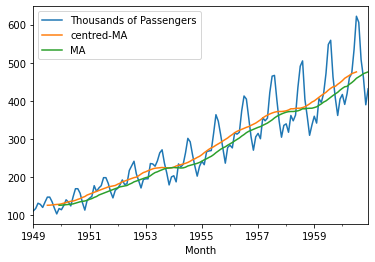

In [4]:
# visualize the original data and the two moving averages
x = data_set.plot()

In [5]:
data_set['detrended'] = data_set['Thousands of Passengers']-data_set['centred-MA']

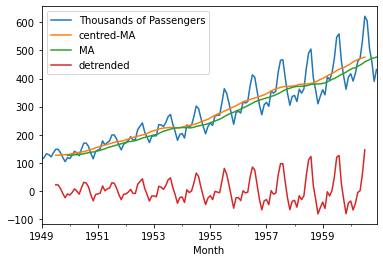

In [6]:
x = data_set.plot()

In [12]:
from statsmodels.tsa.stattools import adfuller, kpss

df = data_set['detrended'].dropna()

# ADF Test
# where the null hypothesis is the time series possesses a unit root and is non-stationary. 
# So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis. )

result = adfuller(df, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.219821202784966
p-value: 0.0006098038156792091
Critical Values:
   1%, -3.4865346059036564
Critical Values:
   5%, -2.8861509858476264
Critical Values:
   10%, -2.579896092790057


In [14]:
# KPSS Test
# The KPSS test is used to test for trend stationarity. 
# The null hypothesis and the P-Value interpretation is just the opposite of ADH test.
result = kpss(df, regression='c', nlags=None)
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critical Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 0.108155
p-value: 0.100000
Critical Values:
   10%, 0.347
Critical Values:
   5%, 0.463
Critical Values:
   2.5%, 0.574
Critical Values:
   1%, 0.739


/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


#### Check periodicity

In [ ]:
from datetime import datetime
start_date = datetime(1959, 1, 1)
end_date = datetime(1961, 1, 1)
display(data_set[(start_date<=data_set.index)&(data_set.index<=end_date)].plot().figure)


In [ ]:
data_set['MA'] = data_set['Thousands of Passengers'].rolling(window=12, center=True).mean()

In [ ]:
display(data_set.plot().figure)

#### MA of MA

In [ ]:
from IPython.display import Image
Image(filename='MAofMA.png')

In [ ]:
data_set['MA1'] = data_set['Thousands of Passengers'].rolling(window=4, center=True).mean()
data_set['MA2'] = data_set['MA1'].rolling(window=2, center=True).mean()
data_set[['Thousands of Passengers','MA2']].plot()

In [ ]:
data_set

#### Weighted MA

In [ ]:
data_set['wMA'] = data_set['Thousands of Passengers'].ewm(alpha=0.1).mean()
display(data_set[['Thousands of Passengers', 'wMA']].plot().figure)

##### ![Quantia Tiny Logo](https://www.quantiaconsulting.com/logos/quantia_logo_tiny.png) 2020 Quantia Consulting, srl. All rights reserved.